## Testing and reproducibility for statistical code

A variety of best practices have been developed to give people confidence that their data analysis code is operating correctly.  In this notebook we review a few of these strategies.Юнит-тестирование и assert

## Юнит-тестирование
**Юнит-тестирование** — это метод тестирования программного обеспечения, при котором проверяются отдельные модули или функции программы. Целью является убедиться, что каждая часть программы работает корректно. Тесты могут быть автоматическими, что позволяет регулярно проверять функциональность кода после его изменений.

`assert` — это встроенная функция в Python, используемая для создания утверждений в коде. Она проверяет, выполняется ли указанное условие. Если условие истинно, программа продолжает выполнение. Если условие ложно, возникает исключение AssertionError, что позволяет разработчику понять, что что-то пошло не так.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

Sometimes we can reassure ourselve that our code is correct by using a logical check against a known answer.  These checks can be implemented in Python using [assert](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement) expressions that fail when a given expression is not true and run silently otherwise.

A trivial example of an assert is:

In [2]:
assert 3 == 2 + 1 # Проверка выражения с помощью assert
# Проверяет, что 3 равно 2 + 1. Поскольку это условие истинно, код продолжает выполнение без ошибок.

As a slightly more interesting example, suppose that we aren't clear what the numpy [max](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html) function does.  We can reassure ourselves by checking its result against an example where the truth is known:

In [3]:
assert np.max([2, 5, 3]) == 5 # Тестирование функции numpy.max
# Проверяет, что максимальное значение в списке [2, 5, 3] действительно равно 5. Если это не так, возникнет ошибка.

# Testing statistical procedures with simulation

A more interesting example uses simulation to confirm that the result of a procedure that involves random sampling gives results that are close to what is expected.  Specifically, suppose we wish to confirm that the numpy [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) function generates data that follow a standard normal distribution.  One way to do this is to generate a large random sample, and check whether the sample standard deviation is close to 1 (we could also check whether the sample mean is close to zero).  Since the procedure is random, we cannot expect perfect agreement, so we use the numpy [allclose](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) function to check that the sample standard deviation is close to 1.  See the 'allclose' documentation for the precise meaning of the relative and absolute tolerance arguments (rtol and atol).  We fix the seed since there is always a small chance that any simulation-based test will fail.

In [31]:
np.random.seed(123) # Тестирование статистических процедур с помощью симуляции
assert np.allclose(np.random.normal(size=1000).std(), 1, rtol=1e-2, atol=1e-2)

# Устанавливает фиксированное начальное значение для генератора случайных чисел с помощью np.random.seed(123), чтобы результаты были воспроизводимыми.
# Генерирует 1000 случайных чисел из стандартного нормального распределения и проверяет, что их стандартное отклонение близко к 1 (в пределах относительной и абсолютной погрешностей 1e-2).

A known property of the Poisson distribution is that its population mean and variance are identical.  We can check that the sample mean and variance of a random sample from a Poisson distribution are similar.

In [41]:
np.random.seed(123)
x = np.random.poisson(2, size=100000)
assert np.allclose(x.mean(), x.var(), rtol=1e-2, atol=1e-3)

## Testing data manipulation code

Next we consider some ways to reassure us that code involving data manipulation is operating correctly.  Suppose we are analyzing the NHANES 2015-2016 data.  First we will load the data.

In [7]:
# Download NHANES 2015-2016 data
# df = pd.read_csv("nhanes_2015_2016.csv")

url = "https://raw.githubusercontent.com/rashida048/Datasets/master/nhanes_2015_2016.csv"
df = pd.read_csv(url)

# Вывод первых 5 строк данных
print(df.head())

    SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST  HIQ210  
0     43.6     35.9     101.1     2.0  
1     40.0     33.

After loading the data, we may wish to confirm that the sequence variable [SEQN](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SEQN) (which is supposed to be a unique identifier for each subject) is never missing.  This can be done as follows:

In [9]:
# Проверка наличия пропущенных значений в переменной SEQN
assert pd.notnull(df["SEQN"]).all()

# Проверяет, что в столбце SEQN нет пропущенных значений. Если есть пропущенные значения, возникает ошибка.

Suppose further that we wish to check that the SEQN variable is indeed unique:

In [34]:
# Проверка уникальности значений в переменной SEQN
assert len(df["SEQN"].unique()) == df.shape[0]

# Проверяет, что количество уникальных значений в столбце SEQN равно числу строк в DataFrame, подтверждая, что SEQN является уникальным идентификатором.

We can also use *range checks* to confirm that the data are coded as expected.  For example, the age variable is *top coded* at 80, so there should be no values greater than 80 in the data:

In [35]:
# Проверка верхней границы значения возраста
assert df["RIDAGEYR"].max() <= 80

# Проверяет, что максимальное значение в столбце RIDAGEYR (возраст) не превышает 80, так как возраст должен быть "топ-кодирован" на 80.

Suppose we have been told that whenever ALQ101 is missing then ALQ110 must always be missing.  The following assert confirms this:

In [36]:
# Проверка согласованности пропущенных значений между переменными ALQ101 и ALQ110
assert (pd.notnull(df["ALQ101"]) | pd.isnull(df["ALQ110"])).all()

# Проверяет, что если ALQ101 не является пропущенным, то и ALQ110 также должен быть пропущен. Если это условие нарушается, возникает ошибка.

Now suppose that we wish to confirm that all columns of the dataframe contain numbers.  This can be done as follows:

In [10]:
# Проверка, что все столбцы содержат числовые данные
assert all([np.issubdtype(x, np.number) for x in df.dtypes])

# Проверяет, что все столбцы в DataFrame содержат числовые данные. Если хотя бы один столбец содержит нечисловые данные, возникает ошибка.

#### Использование `assert` помогает проверить, что функции и процедуры работают правильно. Юнит-тестирование и assert позволяют находить и исправлять ошибки на ранних этапах разработки, улучшая надёжность и корректность кода.

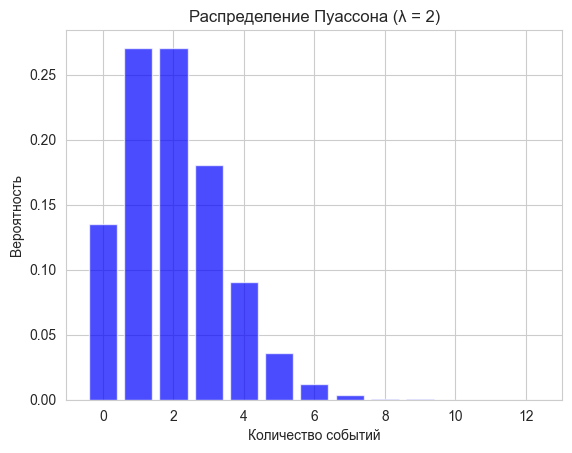

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Параметр λ
lambda_param = 2

# Значения для оси X (количество событий)
x = np.arange(0, 13)

# Вероятности для каждого количества событий
pmf = stats.poisson.pmf(x, lambda_param)

# Построение графика
plt.bar(x, pmf, color='blue', alpha=0.7)
plt.xlabel('Количество событий')
plt.ylabel('Вероятность')
plt.title(f'Распределение Пуассона (λ = {lambda_param})')
plt.show()